# 1 Filter Experiment 

Getting terminal velocity from the slope

run 1, v: -0.9699999999999999
run 2, v: -1.010882352941177
run 3, v: -0.9391176470588223
run 4, v: -0.9458823529411757
run 5, v: -1.0058823529411758
run 6, v: -0.9620588235294112
run 7, v: -0.9879411764705884
run 8, v: -0.9120588235294114
run 9, v: -1.0067647058823528
run 10, v: -0.8826470588235293


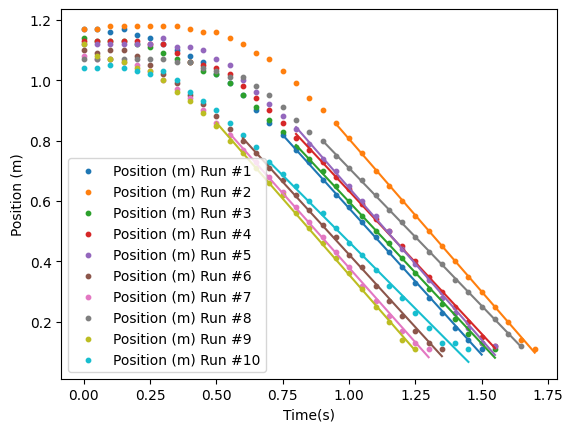

Average v_term: -0.9623235294117644
Experimental uncertainty (max-min): 0.12823529411764767


In [5]:
# This cell of code is just copied from the programming assignment

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

clean_df = pd.read_csv('CleanData.csv')

axis_times = []
for time in range(0,len(clean_df)):
    axis_times.append(round(time*0.05,2))
clean_df = clean_df.set_axis(axis_times)

positions_df = pd.DataFrame([])

for i in range(1,11):
    positions_df[f'Position (m) Run #{i}'] = clean_df[f'Position (m) Run #{i}']

positions_df['Axis times'] = axis_times 

for i in range(1,11):
    y = np.array(positions_df[f'Position (m) Run #{i}']) 
    x = np.array(positions_df['Axis times'])

    plt.scatter(x,y,s=10)
    plt.legend(positions_df.iloc[0:0,0:10])

plt.xlabel('Time(s)')
plt.ylabel('Position (m)')

v_terms = []

for i in range(1,11):
    temp_positions = positions_df[[f'Position (m) Run #{i}','Axis times']].dropna()

    last_time = float(temp_positions.iloc[-1,1])
    starting_time = round(last_time-0.75,2) 

    temp_positions = temp_positions.loc[starting_time:]

    x = np.array(temp_positions['Axis times'])
    y = np.array(temp_positions[f'Position (m) Run #{i}'])
    
    a, b = np.polyfit(x,y,deg = 1)
    xseq = np.linspace(starting_time,last_time)
    plt.plot(xseq, a*xseq+b)
    v_terms.append(float(a))
    print(f'run {i}, v: {a}')

plt.show()

# getting v terminal average and uncertainty
v_term_avg = np.mean(v_terms)
print(f'Average v_term: {v_term_avg}')
print(f'Experimental uncertainty (max-min): {max(v_terms)- min(v_terms)}')

# 10 Filter Experiment

Getting the graph of 10 filters from experiment to later graph with simulation

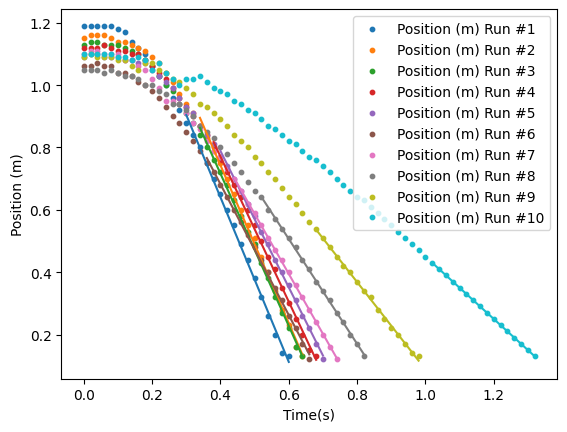

In [2]:
# copied from part 2 of the programming assignent + some frankensteining since code was acting up

clean_df2 = pd.read_csv('clean_data_multiple_filter.csv')

positions_df2 = pd.DataFrame([])

for i in range(1,11):
    positions_df2[f'Position (m) Run #{i}'] = clean_df2[f'Position (m) Run #{i}']

for i in range(1,11):
    y = np.array(positions_df2[f'Position (m) Run #{i}']) 
    x = np.array(clean_df2[f'Time (s) Run #{i}'])

    plt.scatter(x,y,s=10)
    plt.legend(positions_df2.iloc[0:0,0:10])

plt.xlabel('Time(s)')
plt.ylabel('Position (m)')

for i in range(1,11):
    temp_positions = positions_df2[f'Position (m) Run #{i}'].dropna()
    temp_time = clean_df2[f'Time (s) Run #{i}'].dropna()

    last_time = float(temp_time.iloc[-1])
    starting_time = round(last_time-0.30,2) # change the -0.30 to bigger number if you want, kept small to find more accurate v_term of run #1

    x = np.array(temp_time[int(starting_time*50):])
    y = np.array(temp_positions[int(starting_time*50):])

    a, b = np.polyfit(x,y,deg = 1)
    xseq = np.linspace(starting_time,last_time) 
    plt.plot(xseq, a*xseq+b)
    # print(f'v_term for run# {i}: {a}')
plt.show()

# Simulation and Plotting with Experiment

Calculating C, Euler's method, plotting with run #1 from 10 filter experiment

p: 1.1918341126924452
0.009
C: 1.066577044700844


Text(0, 0.5, 'Position (m)')

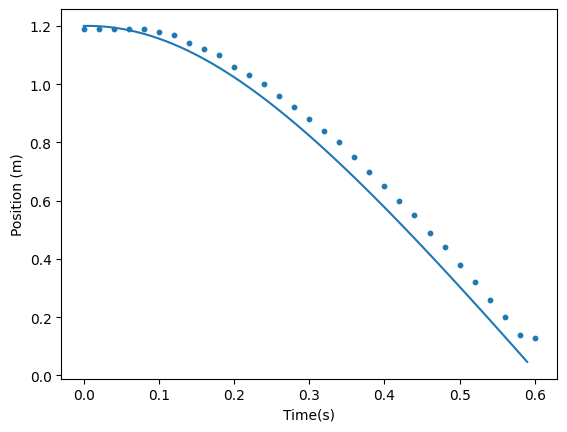

In [ ]:

m10 = 0.009 # mass of 10 FILTERS (kg)
m1 = 0.0009 # mass of 1 FILTER (kg)
A = 0.015 # cross sectional area (m^2)
#p CALCULATION:
R = 287 # J/kg * k, got this from PV = nRT, which uses air's molar mass to change R = 8.31 J/mol * K to use kg instead
T = 23 + 273.15 # 23 c to kelvin
p = 101300 / (R * T) # 101.3 kPa comes from standard atmospheric pressure -> to Pa by *1000 to get 101300

print(f'p: {p}')

yi = 1.2
vi = 0
dT = 0.01
    
C = 2*m1*9.81/((v_term_avg**2)*p*A)

# print(f'C: {C}')

ypositions = np.array([])
times = [t*dT for t in range(60)]

for t in range(60):
    ypositions = np.append(ypositions,yi)
    acceleration = -9.8 + (C*p*A*(vi ** 2)*0.5)/m10
    vf = vi + acceleration * dT
    yf = yi + vi * dT
    vi = vf
    yi = yf

plt.plot(times,ypositions)

# copied from above, plotting the 10 filter run

for i in range(1,2):
    y = np.array(positions_df2[f'Position (m) Run #{i}']) 
    x = np.array(clean_df2[f'Time (s) Run #{i}'])

    plt.scatter(x,y,s=10)

plt.xlabel('Time(s)')
plt.ylabel('Position (m)')

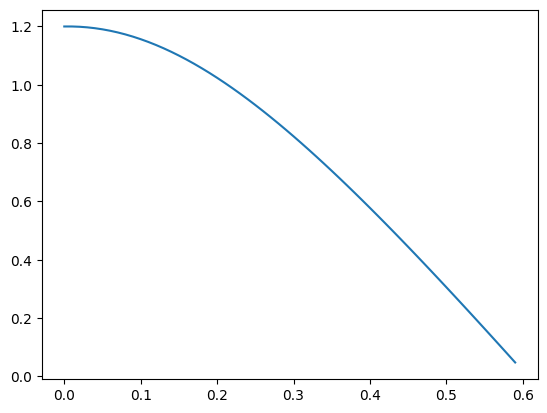

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SIMULATION CODE

m10 = 0.009 # mass of 10 FILTERS (kg)
m1 = 0.0009 # mass of 1 FILTER (kg)
A = 0.015 # cross sectional area m^2
p = 101300 / (287 * 296.15) # air density (kg/m^3)
v_term = -0.96 # m/As
yi = 1.2 # m
vi = 0 # m/s
dT = 0.01 #s
    
C = 2*m1*9.81/((v_term**2)*p*A)

ypositions = np.array([])
times = [t*dT for t in range(60)] # 0.6 second drop to match expperimental results 

for t in range(60):
    ypositions = np.append(ypositions,yi)
    acceleration = -9.8 + (C*p*A*(vi ** 2)*0.5)/m10
    vf = vi + acceleration * dT
    yf = yi + vi * dT
    vi = vf
    yi = yf

plt.plot(times,ypositions)